In [53]:
import pandas as pd
import math
import numpy as np
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords
import neattext.functions as nfx
import emoji
import advertools as adv
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
plt.style.use('ggplot')
import string
from string import digits
from pprint import pprint

import gensim, logging, warnings#the library for Topic modelling
from gensim.utils import  simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
from nltk.stem.wordnet import WordNetLemmatizer
import pyLDAvis #LDA visualization library
import pyLDAvis.gensim_models
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

warnings.simplefilter('ignore')
from itertools import chain
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [83]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','%','.'])

In [84]:
march=pd.read_csv('01_PREPROCESSED_MARCH.csv')
april=pd.read_csv('02_PREPROCESSED_APRIL.csv')
may=pd.read_csv('03_PREPROCESSED_MAY.csv')
june=pd.read_csv('04_PREPROCESSED_JUNE.csv')
july=pd.read_csv('05_PREPROCESSED_JULY.csv')
august=pd.read_csv('06_PREPROCESSED_AUGUST.csv')


In [85]:
for i in range(0,2452):
    march['clean_tweet'][i]= ''.join([i for i in march['clean_tweet'][i] if not i.isdigit()])
for i in range(0,2624):
    april['clean_tweet'][i]= ''.join([i for i in april['clean_tweet'][i] if not i.isdigit()])
for i in range(0,1836):
    may['clean_tweet'][i]= ''.join([i for i in may['clean_tweet'][i] if not i.isdigit()])
for i in range(0,2439):
    june['clean_tweet'][i]= ''.join([i for i in june['clean_tweet'][i] if not i.isdigit()])
for i in range(0,1993):
    july['clean_tweet'][i]= ''.join([i for i in july['clean_tweet'][i] if not i.isdigit()])
for i in range(0,1698):
    august['clean_tweet'][i]= ''.join([i for i in august['clean_tweet'][i] if not i.isdigit()])

In [86]:
stop = set(stop_words)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [87]:
march['filteredToken']=march['clean_tweet'].apply(clean)
april['filteredToken']=april['clean_tweet'].apply(clean)
may['filteredToken']=may['clean_tweet'].apply(clean)
june['filteredToken']=june['clean_tweet'].apply(clean)
july['filteredToken']=july['clean_tweet'].apply(clean)
august['filteredToken']=august['clean_tweet'].apply(clean)

In [88]:
march[['clean_tweet','filteredToken']]

,clean_tweet,filteredToken
0,Germanys Covid response was the envy of the world your daily reminder that the world just means...,"[germany, covid, response, envy, world, daily, reminder, world, mean, white, people, via]"
1,Pfizer amp Moderna claim their vaccines very safe amp effective Estimated gt deaths asso w Pfiz...,"[pfizer, amp, moderna, claim, vaccine, safe, amp, effective, estimated, gt, death, asso, w, pfiz..."
2,We recently published the predictors of hospitalization among older adults with COVID,"[recently, published, predictor, hospitalization, among, older, adult, covid]"
3,Them dey do Covid test AED private clinics But govt own na free None will stop me,"[dey, covid, test, aed, private, clinic, govt, na, free, none, stop]"
4,Time will tell So far and based on the data from millions of people vaccinated around the world...,"[time, tell, far, based, data, million, people, vaccinated, around, world, potential, benefit, v..."
...,...,...
2447,If you guys cannot control covid in your state which has become Coronarastra from Maharastra l...,"[guy, cannot, control, covid, state, become, coronarastra, maharastra, learn, west, bengal, tack..."
2448,In Barasat Hospital COVID Vaccines should be given but the people here are sitting from : AM Bu...,"[barasat, hospital, covid, vaccine, given, people, sitting, vaccination, process, haven’t, start..."
2449,Replying to,[replying]
2450,Dear sir request you to allow the vaccination of COVID for patients below and having co morbid...,"[dear, sir, request, allow, vaccination, covid, patient, co, morbidity, long, time]"


In [89]:
all_words_march = [word for tokens in march['filteredToken']for word in tokens]
tweet_lengths_march = [len(tokens) for tokens in march['filteredToken']]

all_words_april = [word for tokens in april['filteredToken']for word in tokens]
tweet_lengths_april = [len(tokens) for tokens in april['filteredToken']]

all_words_may = [word for tokens in may['filteredToken']for word in tokens]
tweet_lengths_may = [len(tokens) for tokens in may['filteredToken']]

all_words_june = [word for tokens in june['filteredToken']for word in tokens]
tweet_lengths_june = [len(tokens) for tokens in june['filteredToken']]

all_words_july = [word for tokens in july['filteredToken']for word in tokens]
tweet_lengths_july = [len(tokens) for tokens in july['filteredToken']]

all_words_august = [word for tokens in august['filteredToken']for word in tokens]
tweet_lengths_august = [len(tokens) for tokens in august['filteredToken']]


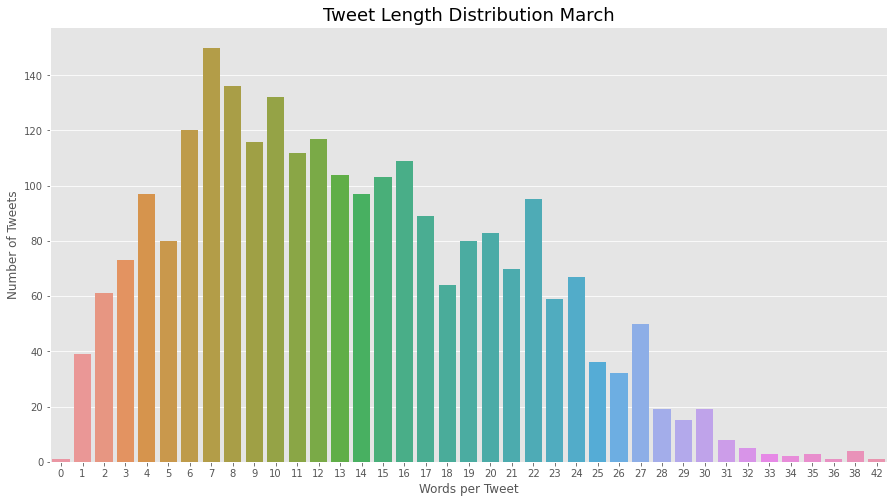

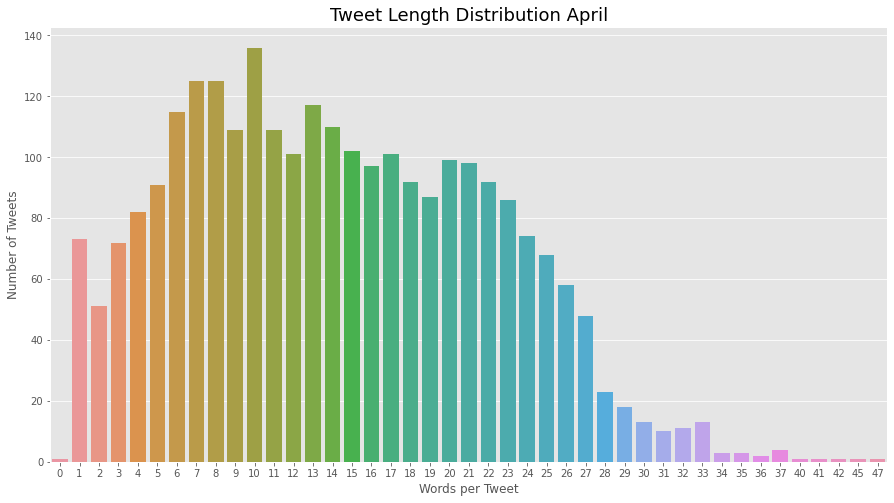

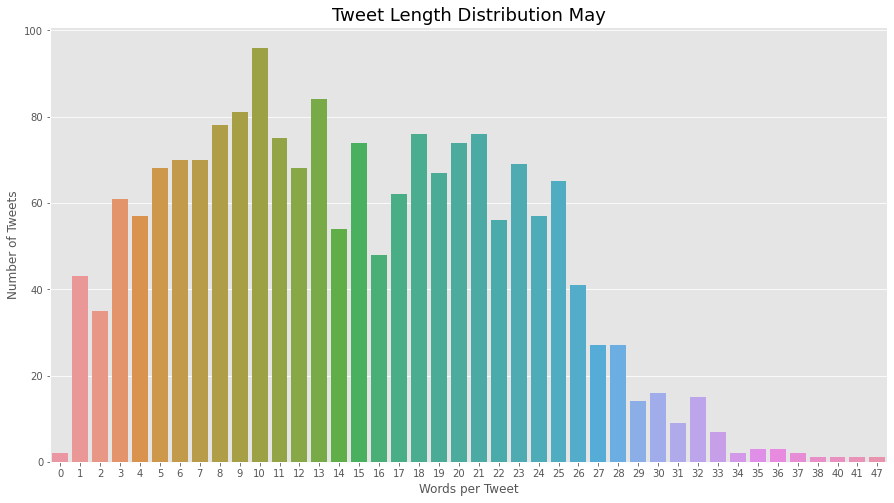

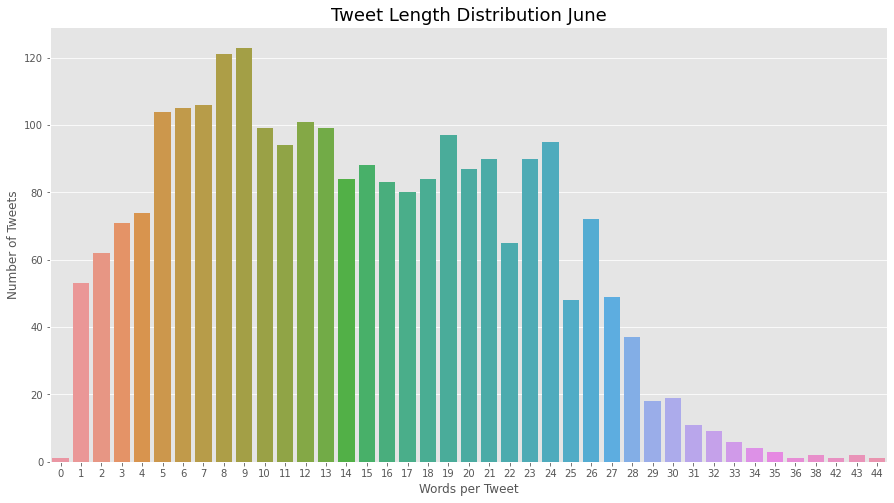

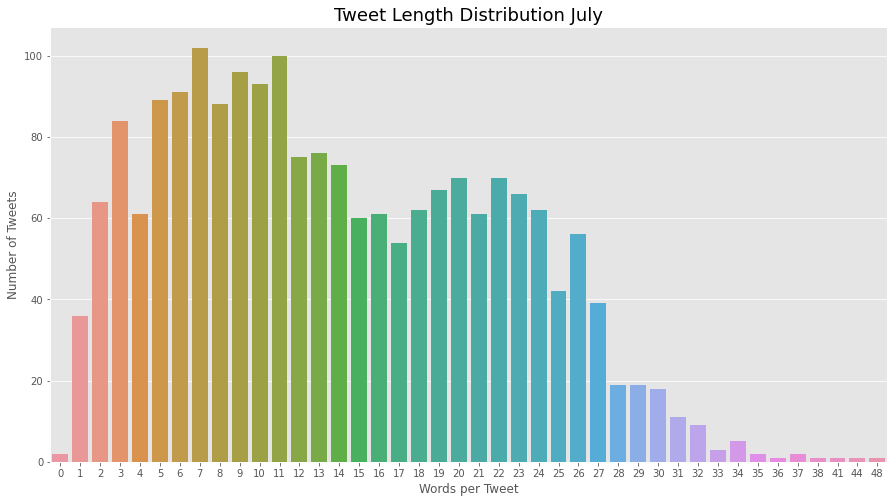

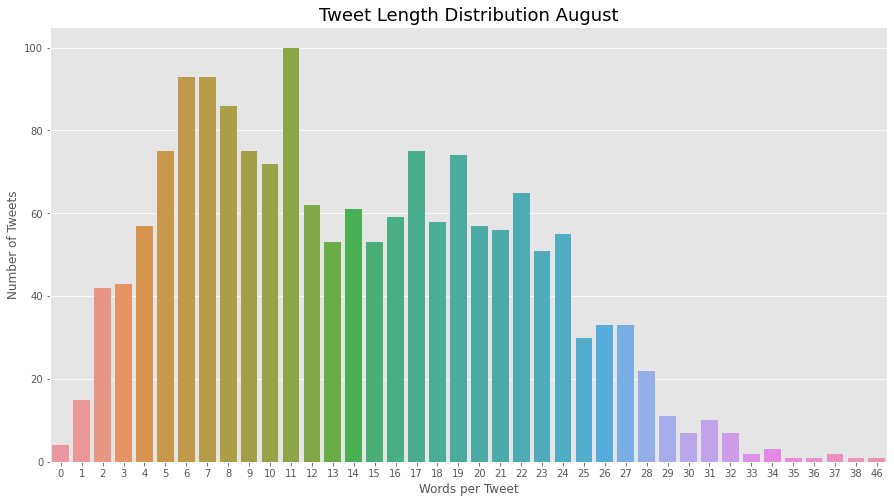

In [90]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths_march)
plt.title('Tweet Length Distribution March', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths_april)
plt.title('Tweet Length Distribution April', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths_may)
plt.title('Tweet Length Distribution May', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths_june)
plt.title('Tweet Length Distribution June', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths_july)
plt.title('Tweet Length Distribution July', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths_august)
plt.title('Tweet Length Distribution August', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [92]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data_march = march['clean_tweet']
data_words_march = list(sent_to_words(data_march))

In [93]:
data_words_march

[['germanys',
  'covid',
  'response',
  'was',
  'the',
  'envy',
  'of',
  'the',
  'world',
  'your',
  'daily',
  'reminder',
  'that',
  'the',
  'world',
  'just',
  'means',
  'white',
  'people',
  'via'],
 ['pfizer',
  'amp',
  'moderna',
  'claim',
  'their',
  'vaccines',
  'very',
  'safe',
  'amp',
  'effective',
  'estimated',
  'gt',
  'deaths',
  'asso',
  'pfizer',
  'vaccines',
  'in',
  'nor',
  'spain',
  'german',
  'etc',
  'pfizer',
  'is',
  'exempted',
  'from',
  'legal',
  'suits',
  'by',
  'politicians',
  'collusion',
  'chance',
  'of',
  'dying',
  'from',
  'covid',
  'is',
  'in',
  'by',
  'vaccine'],
 ['we',
  'recently',
  'published',
  'the',
  'predictors',
  'of',
  'hospitalization',
  'among',
  'older',
  'adults',
  'with',
  'covid'],
 ['them',
  'dey',
  'do',
  'covid',
  'test',
  'aed',
  'private',
  'clinics',
  'but',
  'govt',
  'own',
  'na',
  'free',
  'none',
  'will',
  'stop',
  'me'],
 ['time',
  'will',
  'tell',
  'so',
  '

In [94]:
march1=march['filteredToken'].tolist()
march1

[['germany',
  'covid',
  'response',
  'envy',
  'world',
  'daily',
  'reminder',
  'world',
  'mean',
  'white',
  'people',
  'via'],
 ['pfizer',
  'amp',
  'moderna',
  'claim',
  'vaccine',
  'safe',
  'amp',
  'effective',
  'estimated',
  'gt',
  'death',
  'asso',
  'w',
  'pfizer',
  'vaccine',
  'spain',
  'german',
  'etc',
  'pfizer',
  'exempted',
  'legal',
  'suit',
  'politician',
  'collusion',
  'chance',
  'dying',
  'covid',
  'vaccine'],
 ['recently',
  'published',
  'predictor',
  'hospitalization',
  'among',
  'older',
  'adult',
  'covid'],
 ['dey',
  'covid',
  'test',
  'aed',
  'private',
  'clinic',
  'govt',
  'na',
  'free',
  'none',
  'stop'],
 ['time',
  'tell',
  'far',
  'based',
  'data',
  'million',
  'people',
  'vaccinated',
  'around',
  'world',
  'potential',
  'benefit',
  'vaccination',
  'covid',
  'far',
  'outweigh',
  'potential',
  'sideeffects'],
 ['texas', 'mississippi', 'lift', 'covid', 'precaution', 'via'],
 ['cdc', 'say', 'time'

In [95]:
if data_words_march==march1:
    print(1)
else:
    print(0)

0


In [96]:
dictionary = corpora.Dictionary(march['filteredToken'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

2022-03-28 23:02:46,642 | INFO | dictionary.py:199 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2022-03-28 23:02:46,684 | INFO | dictionary.py:204 | add_documents | built Dictionary(6448 unique tokens: ['covid', 'daily', 'envy', 'germany', 'mean']...) from 2452 documents (total 32924 corpus positions)
2022-03-28 23:02:46,687 | INFO | utils.py:447 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary(6448 unique tokens: ['covid', 'daily', 'envy', 'germany', 'mean']...) from 2452 documents (total 32924 corpus positions)", 'datetime': '2022-03-28T23:02:46.687521', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


30776


In [97]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in march['filteredToken']]
print(len(doc_term_matrix))

2452


In [98]:
lda = gensim.models.ldamodel.LdaModel

In [33]:
num_topics=5
ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

2022-03-28 21:42:48,282 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.2
2022-03-28 21:42:48,283 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.2
2022-03-28 21:42:48,284 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-03-28 21:42:48,289 | INFO | ldamodel.py:947 | update | running online (multi-pass) LDA training, 5 topics, 50 passes over the supplied corpus of 2452 documents, updating model once every 2000 documents, evaluating perplexity every 2452 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-28 21:42:48,290 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/2452
2022-03-28 21:42:49,062 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 2452 documents
2022-03-28 21:42:49,067 | INFO | ldamodel.py:1196 | show_topics | topic #0 (0.200): 0.020*"covid" + 0.015*"vaccine" + 0.013*"case" + 0.009*"news" + 0.007*"please" + 0.006*"a

In [99]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [100]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=march['filteredToken'], limit=50, start=2, step=2)

2022-03-28 23:02:59,934 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.5
2022-03-28 23:02:59,935 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.5
2022-03-28 23:02:59,937 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-03-28 23:02:59,940 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 2452 documents, updating model once every 2000 documents, evaluating perplexity every 2452 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-28 23:02:59,940 | WARNING | ldamodel.py:958 | update | too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-03-28 23:02:59,941 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/2452
2022-03-28 23:03:00,842 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 2452

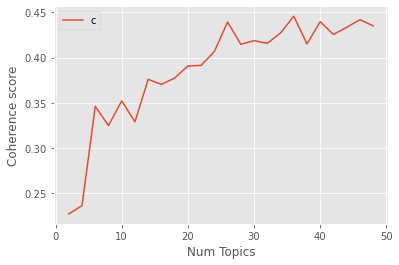

In [101]:
limit=50; start=2; step=2;
x = range(start, limit, step)
y = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [102]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2274
Num Topics = 4  has Coherence Value of 0.2365
Num Topics = 6  has Coherence Value of 0.3462
Num Topics = 8  has Coherence Value of 0.3249
Num Topics = 10  has Coherence Value of 0.3523
Num Topics = 12  has Coherence Value of 0.3291
Num Topics = 14  has Coherence Value of 0.376
Num Topics = 16  has Coherence Value of 0.3704
Num Topics = 18  has Coherence Value of 0.3775
Num Topics = 20  has Coherence Value of 0.3908
Num Topics = 22  has Coherence Value of 0.3914
Num Topics = 24  has Coherence Value of 0.4068
Num Topics = 26  has Coherence Value of 0.4394
Num Topics = 28  has Coherence Value of 0.4147
Num Topics = 30  has Coherence Value of 0.4188
Num Topics = 32  has Coherence Value of 0.4158
Num Topics = 34  has Coherence Value of 0.4273
Num Topics = 36  has Coherence Value of 0.4457
Num Topics = 38  has Coherence Value of 0.4152
Num Topics = 40  has Coherence Value of 0.4397
Num Topics = 42  has Coherence Value of 0.4256
Num Topics = 44  h

In [103]:
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

2022-03-28 23:06:34,496 | INFO | ldamodel.py:1196 | show_topics | topic #0 (0.083): 0.027*"covid" + 0.020*"coronavirus" + 0.018*"case" + 0.013*"election" + 0.013*"vaccinate" + 0.010*"country" + 0.010*"minister" + 0.009*"pm" + 0.008*"via" + 0.008*"likely"
2022-03-28 23:06:34,497 | INFO | ldamodel.py:1196 | show_topics | topic #1 (0.083): 0.053*"covid" + 0.011*"case" + 0.011*"curfew" + 0.008*"mr" + 0.008*"coronavirus" + 0.008*"corona" + 0.008*"time" + 0.007*"one" + 0.007*"positive" + 0.007*"government"
2022-03-28 23:06:34,498 | INFO | ldamodel.py:1196 | show_topics | topic #2 (0.083): 0.020*"corona" + 0.016*"covid" + 0.016*"case" + 0.011*"terrorist" + 0.010*"virus" + 0.009*"sir" + 0.009*"street" + 0.008*"curfew" + 0.008*"recovery" + 0.008*"day"
2022-03-28 23:06:34,498 | INFO | ldamodel.py:1196 | show_topics | topic #3 (0.083): 0.029*"covid" + 0.024*"vaccine" + 0.013*"vaccination" + 0.013*"amp" + 0.013*"curfew" + 0.011*"coronavirus" + 0.011*"help" + 0.009*"india" + 0.009*"defeat" + 0.009*

[(0,
  '0.027*"covid" + 0.020*"coronavirus" + 0.018*"case" + 0.013*"election" + 0.013*"vaccinate" + 0.010*"country" + 0.010*"minister" + 0.009*"pm" + 0.008*"via" + 0.008*"likely"'),
 (1,
  '0.053*"covid" + 0.011*"case" + 0.011*"curfew" + 0.008*"mr" + 0.008*"coronavirus" + 0.008*"corona" + 0.008*"time" + 0.007*"one" + 0.007*"positive" + 0.007*"government"'),
 (2,
  '0.020*"corona" + 0.016*"covid" + 0.016*"case" + 0.011*"terrorist" + 0.010*"virus" + 0.009*"sir" + 0.009*"street" + 0.008*"curfew" + 0.008*"recovery" + 0.008*"day"'),
 (3,
  '0.029*"covid" + 0.024*"vaccine" + 0.013*"vaccination" + 0.013*"amp" + 0.013*"curfew" + 0.011*"coronavirus" + 0.011*"help" + 0.009*"india" + 0.009*"defeat" + 0.009*"variant"'),
 (4,
  '0.023*"people" + 0.017*"covid" + 0.012*"corona" + 0.011*"virus" + 0.010*"owner" + 0.009*"social" + 0.008*"positive" + 0.008*"mask" + 0.008*"please" + 0.008*"found"'),
 (5,
  '0.021*"covid" + 0.019*"teach" + 0.017*"people" + 0.016*"knowledge" + 0.013*"case" + 0.012*"corona" 

In [104]:
lda_display = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [105]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=data_words_march):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=march['filteredToken'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.9295,"case, covid, call, bengal, new, recovery, state, death, report, india","[germany, covid, response, envy, world, daily, reminder, world, mean, white, people, via]"
1,1,9.0,0.7802,"case, covid, call, bengal, new, recovery, state, death, report, india","[pfizer, amp, moderna, claim, vaccine, safe, amp, effective, estimated, gt, death, asso, w, pfiz..."
2,2,4.0,0.8980,"people, covid, corona, virus, owner, social, positive, mask, please, found","[recently, published, predictor, hospitalization, among, older, adult, covid]"
3,3,0.0,0.8561,"covid, coronavirus, case, election, vaccinate, country, minister, pm, via, likely","[dey, covid, test, aed, private, clinic, govt, na, free, none, stop]"
4,4,7.0,0.8048,"curfew, night, covid, pm, corona, day, u, life, march, please","[time, tell, far, based, data, million, people, vaccinated, around, world, potential, benefit, v..."
5,5,1.0,0.8689,"covid, case, curfew, mr, coronavirus, corona, time, one, positive, government","[texas, mississippi, lift, covid, precaution, via]"
6,6,9.0,0.8690,"case, covid, call, bengal, new, recovery, state, death, report, india","[cdc, say, time, ease, covid, restriction]"
7,7,1.0,0.9236,"covid, case, curfew, mr, coronavirus, corona, time, one, positive, government","[“the, lymph, node, armpit, area, mammogram, larger, side, recent, covid, vaccine”]"
8,8,4.0,0.9633,"people, covid, corona, virus, owner, social, positive, mask, please, found","[preparing, new, kind, knowledge, highlighted, postcovid, transitioning, serve, people, governme..."
9,9,11.0,0.7708,"hand, curfew, corona, virus, amp, night, covid, due, anniversary, one","[till, date, update, ami, ‘s, covid, vaccine, auto, response, stating, let, it’s, week, talk, ex..."


In [106]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9672,"covid, coronavirus, case, election, vaccinate, country, minister, pm, via, likely","[wonderwhether, indiatoday, indian, medialeaves, opportunity, belittle, country, show, negative,..."
1,1.0,0.9712,"covid, case, curfew, mr, coronavirus, corona, time, one, positive, government","[eci, told, photo, petrol, pump, costing, bjp, voteswhat, theimages, covid, vaccine, certificate..."
2,2.0,0.9673,"corona, covid, case, terrorist, virus, sir, street, curfew, recovery, day","[sirmaur, corona, sample, detail, rtpcr, pending, positive, rtpcr, new, positive, inprocess, tru..."
3,3.0,0.9704,"covid, vaccine, vaccination, amp, curfew, coronavirus, help, india, defeat, variant","[police, seized, thousand, fake, coronavirus, vaccine, south, africa, amp, china, amp, made, arr..."
4,4.0,0.9722,"people, covid, corona, virus, owner, social, positive, mask, please, found","[yes, covid, case, acting, catalyst, maha, significantly, increasing, us, par, koi, dhyaan, nahi..."
5,5.0,0.9704,"covid, teach, people, knowledge, case, corona, hand, coronavirus, year, new","[pnr, rac, seat, issued, passenger, seat, lady, gent, q, hw, u, issue, lady, gent, seat, q, durn..."
6,6.0,0.9745,"covid, vaccine, coronavirus, case, first, people, dose, amp, lakh, second","[—struggled, bangladesh, —sent, pic, email, —made, tea, using, naali, gas, —entire, political, s..."
7,7.0,0.9672,"curfew, night, covid, pm, corona, day, u, life, march, please","[last, one, pushed, totalwas, billion, billion, went, overseas, full, payment, law, nothing, cov..."
8,8.0,0.9738,"covid, curfew, people, corona, request, allow, minimize, counter, process, amp","[covid, restriction, gt, indoor, event, amp, dining, banned, gt, market, timing, pm, gt, outdoor..."
9,9.0,0.9765,"case, covid, call, bengal, new, recovery, state, death, report, india","[roj, thousand, se, bhi, jada, case, araha, haimaharashtra, phir, bhi, koi, serious, decision, n..."


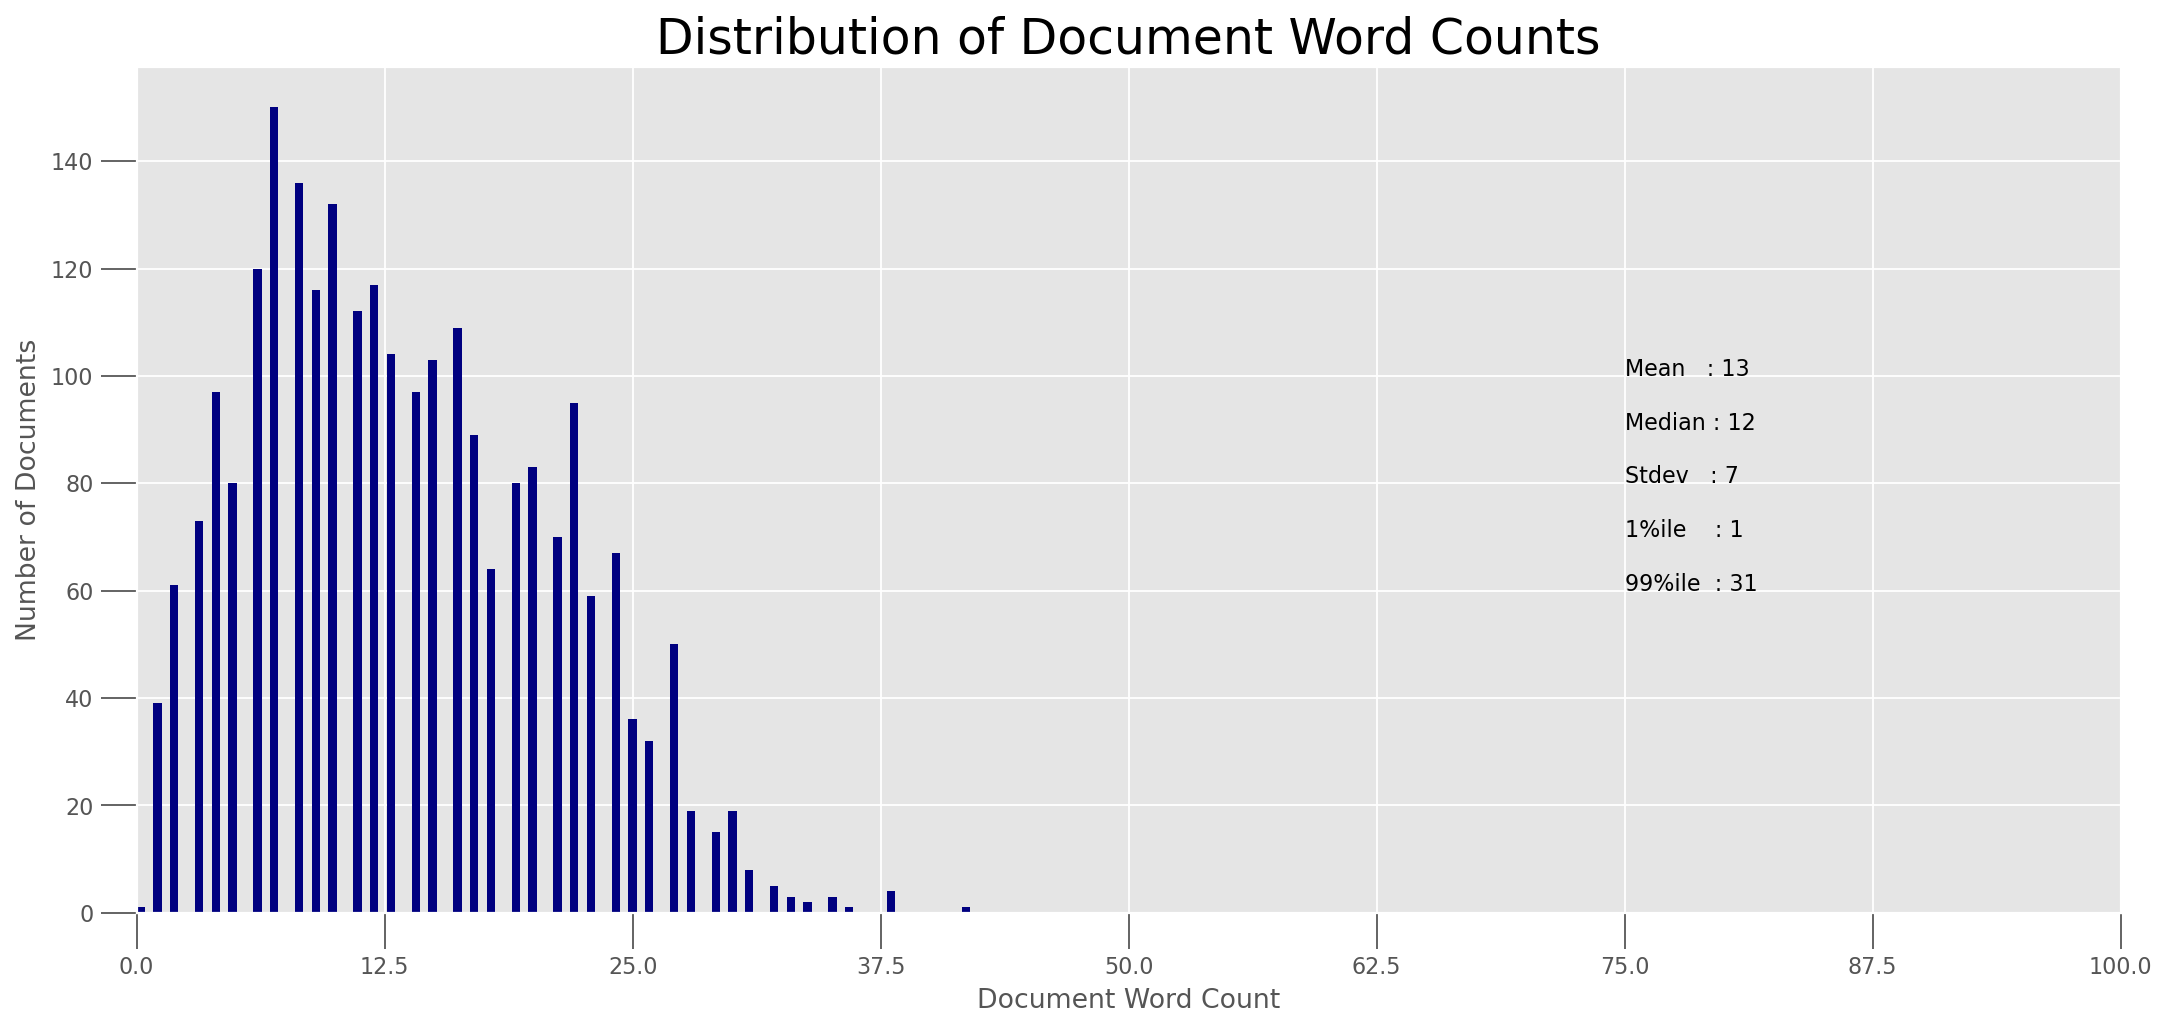

In [108]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(75, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(75,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(75,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(75,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(75,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [112]:
x = lda.show_topics(num_topics=12, num_words=5, formatted=False)

TypeError: show_topics() missing 1 required positional argument: 'self'

TypeError: 'type' object is not subscriptable

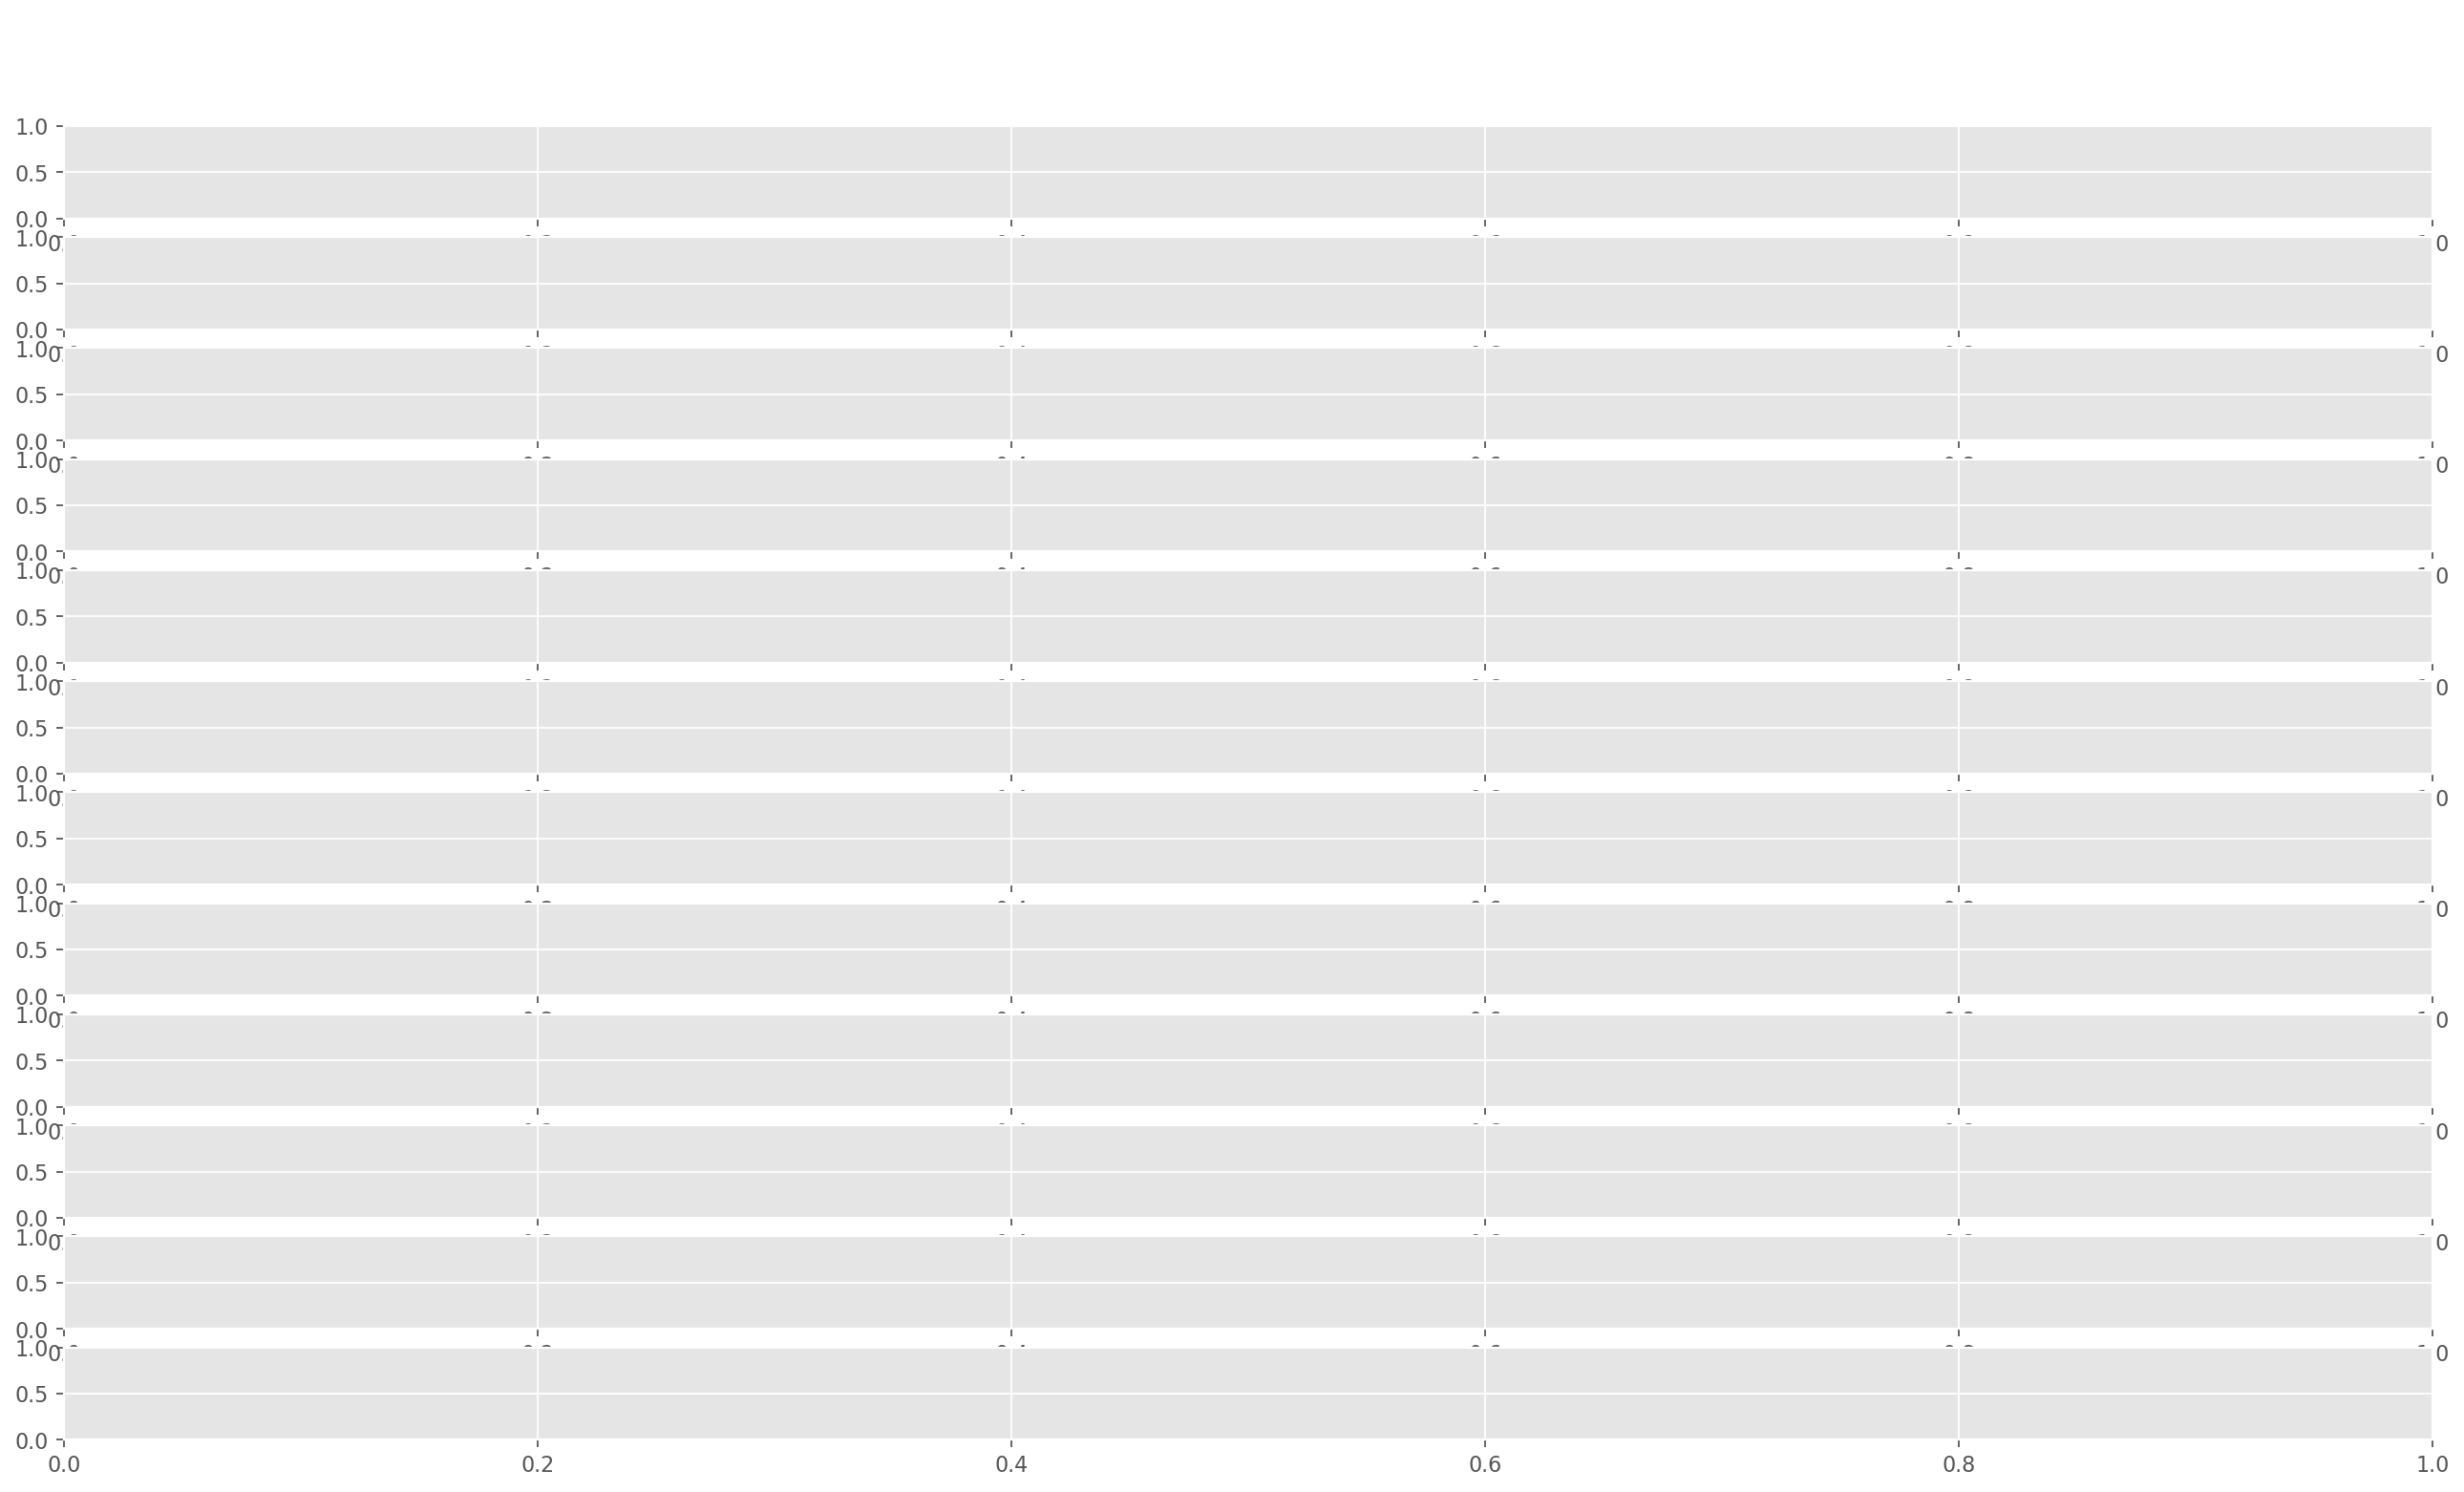

In [111]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda, corpus=doc_term_matrix, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    